In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('./2017_jun_final.csv')

In [5]:
data.head()


,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


In [6]:
data.shape

(8704, 25)

In [7]:
data.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [8]:
data.isnull().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Специализация                       7219
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Университет                          358
Еще.студент                            0
Уровень.английского                    0
Предметная.область                   223
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

In [9]:
not_null_values = data.isnull().sum()[data.isnull().sum() > 0].index

In [10]:
data.drop(not_null_values[1:], inplace=True, axis=1)

In [11]:
data.isnull().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Еще.студент                            0
Уровень.английского                    0
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

Удалите все строки в исходной таблице с помощью метода dropna

In [12]:
data = data.dropna()

In [13]:
data.shape

(4854, 20)

In [14]:
#  Создайте новую таблицу python_data в которой будут только строки со специалистами указавшими язык программирования Python
data['Язык.программирования'].unique()

array(['C#/.NET', 'JavaScript', 'C++', 'Java', 'Scala', 'Python',
       'Ruby/Rails', 'Perl', 'Swift', 'PHP', 'C', 'Objective-C', '1С',
       'SQL', 'Other', 'Golang', 'Flex/Flash/AIR', 'Erlang', 'Delphi',
       'Haskell', 'ABAP', 'APL'], dtype=object)

In [15]:
python_data = data[data['Язык.программирования'] == 'Python']

In [16]:
python_data.shape

(207, 20)

In [17]:
for label_df, df in python_data.groupby(['Должность']):
    print(label_df)
    print(df.shape[0])

Junior Software Engineer
63
Senior Software Engineer
31
Software Engineer
100
System Architect
2
Technical Lead
11


Создайте новый DataFrame, где для сгруппированных данных по столбцу "Должность", выполните агрегацию данных с помощью метода agg и найдите минимальное и максимальное значение в столбце "Зарплата.в.месяц"

In [18]:
data_1 = pd.read_csv('./2017_jun_final.csv')

In [19]:
data_1.groupby(['Должность'])['Зарплата.в.месяц'].agg([np.min, np.max])

,amin,amax
Должность,,
Business analyst,200,5000
DBA,380,6000
Data Scientist / Data Analyst,150,8000
Designer,100,4000
DevOps,194,10000
Director of Engineering / Program Director,1500,34000
ERP / CRM,100,6000
Game designer,150,6800
HR,100,7000


Создайте функцию fill_avg_salary которая будет возвращать среднее значение заработной платы в месяц. Используйте ее для метода apply и создайте новый столбик "avg"

In [20]:
def fill_avg_salary(salary):
    return np.mean(salary)

In [21]:
avg_salaries = data_1.groupby(['Должность'])['Зарплата.в.месяц'].apply(fill_avg_salary)

In [22]:
data_1['avg'] = data_1['Должность'].map(avg_salaries.to_dict())

In [23]:
data_1['avg'].describe()


count    8704.000000
mean     1666.704159
std       984.897129
min       482.774752
25%       817.339130
50%      1678.630074
75%      2162.688235
max      5066.363636
Name: avg, dtype: float64

In [24]:
data_1.to_csv('new_csv_file_test.csv')

# Module 3


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
2,3,Software Engineer,C#/.NET,4,1,2500,800,Киев,до 1000 человек,Аутсорсинговая,мужской,26,Высшее,False,средний,12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Одесса,до 200 человек,Продуктовая,мужской,30,Среднее,False,ниже среднего,12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10 и более лет,0.5,4500,500,Другой,до 10 человек,Продуктовая,мужской,30,Техникум / Колледж,False,средний,12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500
6,7,Junior Software Engineer,C#/.NET,1,меньше 3 месяцев,600,100,Хмельницкий,до 50 человек,Аутсорсинговая,мужской,23,Высшее,False,ниже среднего,12/06/2017 13:04:26,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.0,0.0,600
7,8,Senior Software Engineer,C++,6,1,3300,500,Киев,до 10 человек,Продуктовая,мужской,28,Высшее,False,выше среднего,12/06/2017 13:04:27,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:53....,6.0,1.0,3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8692,8693,Software Engineer,Java,5,1,3500,650,Удаленно,до 200 человек,Аутсорсинговая,женский,28,Высшее,False,средний,12/07/2017 13:26:49,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,3500
8694,8695,Junior Software Engineer,C#/.NET,1,1,550,550,Харьков,до 200 человек,Аутсорсинговая,мужской,23,Высшее,False,ниже среднего,12/07/2017 14:14:33,Mozilla/5.0 (Windows NT 10.0; WOW64; rv:54.0) ...,1.0,1.0,550
8695,8696,Software Engineer,Python,1,0.5,1500,1000,Киев,до 10 человек,Стартап,мужской,29,Высшее,False,средний,12/07/2017 14:39:21,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,1500
8701,8702,Junior Software Engineer,Ruby/Rails,1,0.5,800,500,Львов,до 10 человек,Аутстаффинговая,мужской,30,Незаконченное высшее,False,выше среднего,12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800


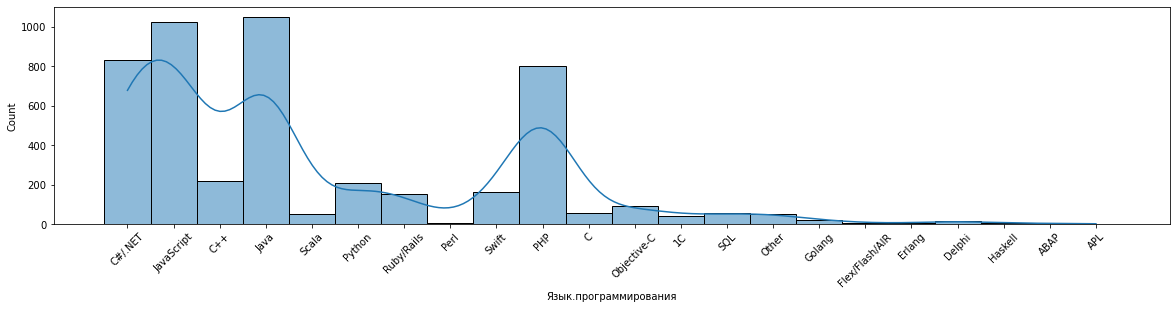

In [43]:
plt.rcParams["figure.figsize"] = (20,4)
sns.histplot(data=data, x='Язык.программирования', kde=True)
plt.xticks(rotation=45)
plt.show()

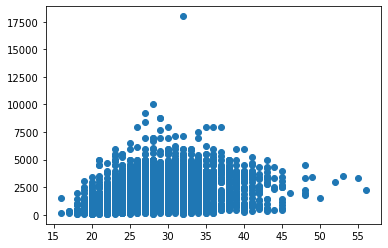

In [50]:
plt.rcParams["figure.figsize"] = (6,4)
plt.scatter(x='Возраст', y='Зарплата.в.месяц', data=data)

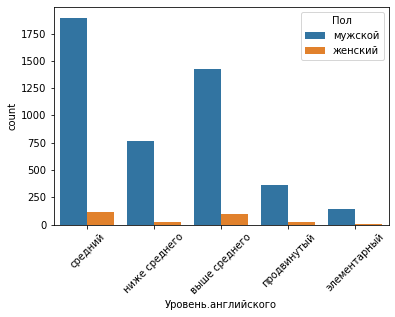

In [61]:
sns.countplot(data=data, x='Уровень.английского', hue='Пол')
plt.xticks(rotation=45)
plt.show()